# Project 1: Predictive Data Mining

## Identifying potential COVID-19 positive patients and their characteristics

### Task 1: Preparation of data

#### Data Loading

In [1]:
import numpy as np

In [2]:
import pandas as pd

data = pd.read_csv("kaggle.csv",encoding='latin-1')
data.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,Patient addmited to regular ward,Patient addmited to semi-intensive unit,Patient addmited to intensive care unit,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation_arterial blood gases,pCO2_arterial blood gas analysis,Base excess_arterial blood gas analysis,pH_arterial blood gas analysis,Total CO2_arterial blood gas analysis,HCO3_arterial blood gas analysis,pO2_arterial blood gas analysis,Arteiral Fio2,Phosphor,ctO2_arterial blood gas analysis
0,001646dfe0e98df,6,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0026b35811a9267,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,00371001b52b72c,1,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00391dd8a9daef9,9,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,003ebccd5d5bfdd,18,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Filtering data to use required columns

In [3]:
data = data[['Patient age quantile','Proteina C reativa', 'Neutrophils', 'Mean platelet volume', 'Monocytes', 'Red blood cell distribution width', 'Red blood Cells', 'Platelets', 'Eosinophils', 'Basophils', 'Leukocytes', 'Mean corpuscular hemoglobin', 'Mean corpuscular volume', 'Mean corpuscular hemoglobin concentration', 'Lymphocytes', 'Hemoglobin', 'Hematocrit','Influenza B rapid test', 'Influenza A rapid test','SARS-Cov-2 exam result']]
data.head()

,Patient age quantile,Proteina C reativa,Neutrophils,Mean platelet volume,Monocytes,Red blood cell distribution width,Red blood Cells,Platelets,Eosinophils,Basophils,Leukocytes,Mean corpuscular hemoglobin,Mean corpuscular volume,Mean corpuscular hemoglobin concentration,Lymphocytes,Hemoglobin,Hematocrit,Influenza B rapid test,Influenza A rapid test,SARS-Cov-2 exam result
0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative
1,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative
2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative
3,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative
4,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative


In [4]:
print("Proportion of positive patients: {}%".format(round(data['SARS-Cov-2 exam result'].value_counts()['positive']/data['SARS-Cov-2 exam result'].value_counts().sum()*100,2)))

Proportion of positive patients: 9.89%


#### Handling Unbalanced Classes

In [5]:
positive = data[data['SARS-Cov-2 exam result']=='positive']
positive.shape

(558, 20)

In [6]:
negative = data[data['SARS-Cov-2 exam result']=='negative'].sample(n=558,random_state=10)
negative.shape

(558, 20)

In [7]:
finalData = pd.concat([positive,negative])
finalData.head()

,Patient age quantile,Proteina C reativa,Neutrophils,Mean platelet volume,Monocytes,Red blood cell distribution width,Red blood Cells,Platelets,Eosinophils,Basophils,Leukocytes,Mean corpuscular hemoglobin,Mean corpuscular volume,Mean corpuscular hemoglobin concentration,Lymphocytes,Hemoglobin,Hematocrit,Influenza B rapid test,Influenza A rapid test,SARS-Cov-2 exam result
14,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive
20,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive
21,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive
23,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive
27,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive


In [8]:
finalData.isna().sum()

Patient age quantile                           0
Proteina C reativa                           997
Neutrophils                                  984
Mean platelet volume                         972
Monocytes                                    970
Red blood cell distribution width            970
Red blood Cells                              970
Platelets                                    970
Eosinophils                                  970
Basophils                                    970
Leukocytes                                   970
Mean corpuscular hemoglobin                  970
Mean corpuscular volume                      970
Mean corpuscular hemoglobin concentration    970
Lymphocytes                                  970
Hemoglobin                                   970
Hematocrit                                   970
Influenza B rapid test                       958
Influenza A rapid test                       958
SARS-Cov-2 exam result                         0
dtype: int64

#### Fixing Data Problems - Missing Value Treatment

In [9]:
finalData['Influenza B rapid test'] = finalData['Influenza B rapid test'].replace(np.nan,'Influenza B rapid test')
finalData['Influenza A rapid test'] = finalData['Influenza A rapid test'].replace(np.nan,'Influenza A rapid test')

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
finalData['Influenza B rapid test'] = le.fit_transform(finalData['Influenza B rapid test'])
finalData['Influenza A rapid test'] = le.fit_transform(finalData['Influenza B rapid test'])
finalData['SARS-Cov-2 exam result'] = le.fit_transform(finalData['SARS-Cov-2 exam result'])

In [11]:
print(finalData['Influenza B rapid test'].value_counts())
print(finalData['Influenza A rapid test'].value_counts())
print(finalData['SARS-Cov-2 exam result'].value_counts())

0    958
1    148
2     10
Name: Influenza B rapid test, dtype: int64
0    958
1    148
2     10
Name: Influenza A rapid test, dtype: int64
1    558
0    558
Name: SARS-Cov-2 exam result, dtype: int64


In [12]:
finalData['Influenza B rapid test'] = finalData['Influenza B rapid test'].replace(0,np.nan)
finalData['Influenza A rapid test'] = finalData['Influenza A rapid test'].replace(0,np.nan)

In [13]:
finalData.fillna(0,inplace=True)

### Task 2: Predictive modeling using Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
X = finalData.drop('SARS-Cov-2 exam result',axis=1)
y = finalData[['SARS-Cov-2 exam result']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=10)

In [15]:
model = DecisionTreeClassifier(random_state=10)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [16]:
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

Train accuracy: 0.6594110115236875
Test accuracy: 0.591044776119403


In [17]:
print(model.tree_.node_count)

117


In [31]:
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

In [32]:
dotfile = StringIO()

In [33]:
export_graphviz(model, out_file=dotfile, feature_names=X.columns)

In [34]:
graph = pydot.graph_from_dot_data(dotfile.getvalue())

In [37]:
for i in graph:
    print(i)

digraph Tree {
node [shape=box];
0 [label="Patient age quantile <= 2.5\ngini = 0.5\nsamples = 781\nvalue = [391, 390]"];
1 [label="Leukocytes <= -0.31\ngini = 0.136\nsamples = 68\nvalue = [63, 5]"];
0 -> 1  [headlabel="True", labelangle=45, labeldistance="2.5"];
2 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"];
1 -> 2;
3 [label="Influenza A rapid test <= 0.5\ngini = 0.112\nsamples = 67\nvalue = [63, 4]"];
1 -> 3;
4 [label="Patient age quantile <= 0.5\ngini = 0.142\nsamples = 39\nvalue = [36, 3]"];
3 -> 4;
5 [label="gini = 0.0\nsamples = 13\nvalue = [13, 0]"];
4 -> 5;
6 [label="Monocytes <= -0.412\ngini = 0.204\nsamples = 26\nvalue = [23, 3]"];
4 -> 6;
7 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"];
6 -> 7;
8 [label="Patient age quantile <= 1.5\ngini = 0.219\nsamples = 24\nvalue = [21, 3]"];
6 -> 8;
9 [label="gini = 0.165\nsamples = 11\nvalue = [10, 1]"];
8 -> 9;
10 [label="gini = 0.26\nsamples = 13\nvalue = [11, 2]"];
8 -> 10;
11 [label="Patient age quantile <= 0.5\ngini = 0.06

In [ ]:
graph[0].write_png("dt_viz.png")

In [18]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.56      0.58       167
           1       0.59      0.62      0.61       168

   micro avg       0.59      0.59      0.59       335
   macro avg       0.59      0.59      0.59       335
weighted avg       0.59      0.59      0.59       335



In [19]:
import numpy as np
importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)
for i in indices:
    print(feature_names[i], ':', importances[i])

Patient age quantile : 0.49231197030360696
Leukocytes : 0.16836454370442772
Proteina C reativa : 0.07778714842929739
Platelets : 0.053334304585990935
Neutrophils : 0.04217622225230019
Red blood cell distribution width : 0.039107330014381124
Mean corpuscular volume : 0.03009694232705316
Mean corpuscular hemoglobin : 0.02952335557661012
Influenza A rapid test : 0.024311400193943913
Monocytes : 0.02161584751035462
Influenza B rapid test : 0.021370935102033688
Eosinophils : 0.0
Mean corpuscular hemoglobin concentration : 0.0
Red blood Cells : 0.0
Lymphocytes : 0.0
Mean platelet volume : 0.0
Hemoglobin : 0.0
Hematocrit : 0.0
Basophils : 0.0


In [20]:
from sklearn.model_selection import GridSearchCV

In [55]:
from sklearn.model_selection import StratifiedKFold
params = {'criterion': ['gini', 'entropy'],
'max_depth': range(1, 19),
'min_samples_leaf': range(0,50,4)[1:]}
cv_1 = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=10),return_train_score=True, cv=StratifiedKFold(random_state=10))
cv_1.fit(X_train, y_train)


C:\Users\pughatol\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:624: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=10, shuffle=False),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(1, 19), 'min_samples_leaf': range(4, 52, 4)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [56]:
print(cv_1.best_params_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 20}


In [67]:
cv_1.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [57]:
print("Train accuracy:", cv_1.score(X_train, y_train))
print("Test accuracy:", cv_1.score(X_test, y_test))

Train accuracy: 0.5902688860435339
Test accuracy: 0.6208955223880597


In [65]:
print(cv_1.best_estimator_.tree_.node_count)

9


In [62]:
import numpy as np
importances = cv_1.best_estimator_.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)
for i in indices:
    print(feature_names[i], ':', importances[i])

Patient age quantile : 0.6392252739484899
Leukocytes : 0.247397686457757
Platelets : 0.1133770395937531
Eosinophils : 0.0
Proteina C reativa : 0.0
Neutrophils : 0.0
Mean platelet volume : 0.0
Monocytes : 0.0
Red blood cell distribution width : 0.0
Red blood Cells : 0.0
Influenza A rapid test : 0.0
Influenza B rapid test : 0.0
Mean corpuscular hemoglobin : 0.0
Mean corpuscular volume : 0.0
Mean corpuscular hemoglobin concentration : 0.0
Lymphocytes : 0.0
Hemoglobin : 0.0
Hematocrit : 0.0
Basophils : 0.0


In [66]:
export_graphviz(cv_1.best_estimator_, out_file=dotfile, feature_names=X.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
for i in graph:
    print(i)

digraph Tree {
node [shape=box];
0 [label="Patient age quantile <= 2.5\ngini = 0.5\nsamples = 781\nvalue = [391, 390]"];
1 [label="Leukocytes <= -0.31\ngini = 0.136\nsamples = 68\nvalue = [63, 5]"];
0 -> 1  [headlabel="True", labelangle=45, labeldistance="2.5"];
2 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"];
1 -> 2;
3 [label="Influenza A rapid test <= 0.5\ngini = 0.112\nsamples = 67\nvalue = [63, 4]"];
1 -> 3;
4 [label="Patient age quantile <= 0.5\ngini = 0.142\nsamples = 39\nvalue = [36, 3]"];
3 -> 4;
5 [label="gini = 0.0\nsamples = 13\nvalue = [13, 0]"];
4 -> 5;
6 [label="Monocytes <= -0.412\ngini = 0.204\nsamples = 26\nvalue = [23, 3]"];
4 -> 6;
7 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"];
6 -> 7;
8 [label="Patient age quantile <= 1.5\ngini = 0.219\nsamples = 24\nvalue = [21, 3]"];
6 -> 8;
9 [label="gini = 0.165\nsamples = 11\nvalue = [10, 1]"];
8 -> 9;
10 [label="gini = 0.26\nsamples = 13\nvalue = [11, 2]"];
8 -> 10;
11 [label="Patient age quantile <= 0.5\ngini = 0.06

In [59]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.56      0.58       167
           1       0.59      0.62      0.61       168

   micro avg       0.59      0.59      0.59       335
   macro avg       0.59      0.59      0.59       335
weighted avg       0.59      0.59      0.59       335



ROC index on test for `model`: 0.6565975192472198
ROC index on test for `cv`: 0.6345523239235814


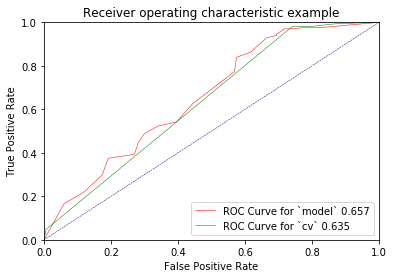

In [69]:
from sklearn.metrics import roc_auc_score
y_pred_proba_lr = model.predict_proba(X_test)
y_pred_proba_lr_cv = cv_1.predict_proba(X_test)


roc_index_lr = roc_auc_score(y_test, y_pred_proba_lr[:, 1])
roc_index_lr_cv = roc_auc_score(y_test, y_pred_proba_lr_cv[:, 1])


print("ROC index on test for `model`:", roc_index_lr)
print("ROC index on test for `cv`:", roc_index_lr_cv)


from sklearn.metrics import roc_curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr[:,1])
fpr_lr_cv, tpr_lr_cv, thresholds_lr_cv = roc_curve(y_test, y_pred_proba_lr_cv[:,1])


import matplotlib.pyplot as plt

plt.plot(fpr_lr, tpr_lr, label='ROC Curve for `model` {:.3f}'.format(roc_index_lr), color='red', lw=0.5)
plt.plot(fpr_lr_cv, tpr_lr_cv, label='ROC Curve for `cv` {:.3f}'.format(roc_index_lr_cv), color='green', lw=0.5)


plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [71]:
df = pd.concat([X_train,X_test])
df['Target'] = cv_1.predict(df)
df.Target.sum()

981

In [72]:
df[df.Target==1].describe()

,Patient age quantile,Proteina C reativa,Neutrophils,Mean platelet volume,Monocytes,Red blood cell distribution width,Red blood Cells,Platelets,Eosinophils,Basophils,Leukocytes,Mean corpuscular hemoglobin,Mean corpuscular volume,Mean corpuscular hemoglobin concentration,Lymphocytes,Hemoglobin,Hematocrit,Influenza B rapid test,Influenza A rapid test,Target
count,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.000000,981.0
mean,10.633028,0.000229,-0.003403,0.038279,0.042269,-0.021362,0.025731,-0.076071,-0.039821,-0.013447,-0.067201,0.005089,-0.001798,0.015123,-0.003390,0.028672,0.026404,0.114169,0.114169,1.0
std,4.873909,0.245129,0.288550,0.309660,0.370801,0.305166,0.311537,0.283930,0.224977,0.223053,0.273967,0.329507,0.332015,0.288268,0.278856,0.271192,0.260927,0.333829,0.333829,0.0
min,3.000000,-0.535362,-2.233470,-1.223449,-2.058669,-1.332725,-1.907856,-2.062515,-0.835508,-1.140144,-1.477658,-5.519430,-5.101581,-3.440245,-1.617727,-1.651396,-1.777679,0.000000,0.000000,1.0
25%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
75%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
max,19.000000,3.510193,2.052433,2.927700,3.640448,4.947686,2.975753,0.738768,2.493503,2.219906,1.992484,1.746323,2.109059,1.936978,2.152110,1.919995,1.655607,2.000000,2.000000,1.0


### Task 3: Predictive modeling using Regression

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataregression = finalData.copy()
cols = list(dataregression.columns)
cols = cols[:17]
for col in cols:
    dataregression[col] = scaler.fit_transform(np.array(dataregression[col]).reshape(-1,1)).ravel()
dataregression.head()

In [21]:
dataregression.hist(figsize=(20,20))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021736BA8EF0>,
      dtype=object)

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
X = dataregression.drop('SARS-Cov-2 exam result',axis=1)
y = dataregression[['SARS-Cov-2 exam result']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=10)

In [53]:
model = LogisticRegression(random_state=10)
# fit it to training data
model.fit(X_train, y_train)

C:\Users\pughatol\Documents\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pughatol\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=10, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

Train accuracy: 0.5633802816901409
Test accuracy: 0.5970149253731343


In [55]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.65      0.62       167
           1       0.61      0.55      0.58       168

   micro avg       0.60      0.60      0.60       335
   macro avg       0.60      0.60      0.60       335
weighted avg       0.60      0.60      0.60       335



In [56]:
from sklearn.model_selection import GridSearchCV

params = {'C': [pow(10, x) for x in range(-6, 4)],
          'tol':[pow(10, x) for x in range(-6, 4)],
         'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
          'random_state':list(np.random.randint(1,5000,10))
        }
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(),return_train_score=True, cv=10, n_jobs=-1)
cv.fit(X_train, y_train)

C:\Users\pughatol\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\pughatol\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'tol': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'random_state': [2475, 1056, 3180, 492, 2358, 1066, 4656, 1150, 10, 3911]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [57]:
print(cv.best_params_)

{'C': 0.0001, 'random_state': 2475, 'solver': 'sag', 'tol': 0.01}


In [58]:
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

Train accuracy: 0.5544174135723432
Test accuracy: 0.5611940298507463


In [59]:
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.94      0.68       167
           1       0.76      0.18      0.30       168

   micro avg       0.56      0.56      0.56       335
   macro avg       0.65      0.56      0.49       335
weighted avg       0.65      0.56      0.49       335



In [60]:
impfeatures = []
for i in zip(list(cv.best_estimator_.coef_[0][1:]),list(X_train.columns)):
    impfeatures.append(i)
sorted(impfeatures,reverse=True)

[(0.0044486554316592606, 'Mean platelet volume'),
 (0.0030227069874458365, 'Lymphocytes'),
 (0.002860111425367208, 'Hemoglobin'),
 (0.0025234507952027556, 'Patient age quantile'),
 (0.0024942291430942853, 'Red blood cell distribution width'),
 (0.001479854979950761, 'Neutrophils'),
 (0.0014005529983378501, 'Mean corpuscular volume'),
 (0.0011863641056038899, 'Monocytes'),
 (0.0004514937904822188, 'Leukocytes'),
 (-0.00017630188130186579, 'Mean corpuscular hemoglobin'),
 (-0.0004366025214560803, 'Proteina C reativa'),
 (-0.0005344459278545136, 'Mean corpuscular hemoglobin concentration'),
 (-0.0013914653299026496, 'Eosinophils'),
 (-0.0017230923532174055, 'Influenza B rapid test'),
 (-0.0017230923532174055, 'Hematocrit'),
 (-0.004012656889201918, 'Platelets'),
 (-0.006868601518811509, 'Red blood Cells'),
 (-0.007017044821609208, 'Basophils')]

In [84]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
rfe = RFECV(estimator = cv.best_estimator_, cv=StratifiedKFold(random_state=10))
rfe.fit(X_train, y_train) # run the RFECV
# comparing how many variables before and after
print("Original feature set", X_train.shape[1])
print("Number of features after elimination", rfe.n_features_)

Original feature set 19
Number of features after elimination 14


C:\Users\pughatol\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:624: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
C:\Users\pughatol\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [85]:
cols = list(np.delete(np.array(dataregression.columns),-1)[rfe.get_support()])

In [86]:
cols = list(np.delete(np.array(dataregression.columns),-1)[rfe.get_support()])
cols.append('SARS-Cov-2 exam result')
reducedData = dataregression[cols]
reducedData.head()

,Patient age quantile,Proteina C reativa,Mean platelet volume,Monocytes,Red blood Cells,Platelets,Eosinophils,Basophils,Leukocytes,Mean corpuscular hemoglobin concentration,Hemoglobin,Hematocrit,Influenza B rapid test,Influenza A rapid test,SARS-Cov-2 exam result
14,-0.877962,-0.000487,-0.077833,-0.070606,-0.043362,0.124252,0.137677,0.060341,0.140291,-0.02847,-0.044166,-0.039827,0.0,0.0,1
20,0.410046,-0.000487,-0.077833,-0.070606,-0.043362,0.124252,0.137677,0.060341,0.140291,-0.02847,-0.044166,-0.039827,0.0,0.0,1
21,0.042043,-0.000487,-0.077833,-0.070606,-0.043362,0.124252,0.137677,0.060341,0.140291,-0.02847,-0.044166,-0.039827,0.0,0.0,1
23,0.594047,-0.000487,-0.077833,-0.070606,-0.043362,0.124252,0.137677,0.060341,0.140291,-0.02847,-0.044166,-0.039827,0.0,0.0,1
27,0.226044,-0.000487,-0.077833,-0.070606,-0.043362,0.124252,0.137677,0.060341,0.140291,-0.02847,-0.044166,-0.039827,0.0,0.0,1


In [89]:
X = reducedData.drop('SARS-Cov-2 exam result',axis=1)
y = reducedData[['SARS-Cov-2 exam result']]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, stratify=y, random_state=10)
params = {'C': [pow(10, x) for x in range(-6, 4)],
          'tol':[pow(10, x) for x in range(-6, 4)],
         'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
          'random_state':list(np.random.randint(1,5000,10))
         }
rfe_cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=10),return_train_score=True, cv=10, n_jobs=-1)
rfe_cv.fit(X_train1, y_train1)

C:\Users\pughatol\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\pughatol\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=10, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'tol': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'random_state': [3396, 4512, 2544, 4311, 1428, 1520, 3990, 846, 3714, 4328]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [90]:
print("Train accuracy:", rfe_cv.score(X_train1, y_train1))
print("Test accuracy:", rfe_cv.score(X_test1, y_test1))

Train accuracy: 0.6005121638924455
Test accuracy: 0.6149253731343284


In [92]:
y_pred1 = rfe_cv.predict(X_test1)
print(classification_report(y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.73      0.37      0.49       167
           1       0.58      0.86      0.69       168

   micro avg       0.61      0.61      0.61       335
   macro avg       0.65      0.61      0.59       335
weighted avg       0.65      0.61      0.59       335



In [93]:
impfeatures = []
for i in zip(list(cv.best_estimator_.coef_[0][1:]),list(X_train1.columns)):
    impfeatures.append(i)
sorted(impfeatures,reverse=True)

[(0.0044486554316592606, 'Monocytes'),
 (0.0025234507952027556, 'Patient age quantile'),
 (0.0024942291430942853, 'Platelets'),
 (0.001479854979950761, 'Mean platelet volume'),
 (0.0014005529983378501, 'Influenza B rapid test'),
 (0.0011863641056038899, 'Red blood Cells'),
 (0.0004514937904822188, 'Hemoglobin'),
 (-0.00017630188130186579, 'Hematocrit'),
 (-0.0004366025214560803, 'Proteina C reativa'),
 (-0.0005344459278545136, 'Influenza A rapid test'),
 (-0.0013914653299026496, 'Leukocytes'),
 (-0.004012656889201918, 'Basophils'),
 (-0.006868601518811509, 'Eosinophils'),
 (-0.007017044821609208, 'Mean corpuscular hemoglobin concentration')]

In [94]:
from sklearn.metrics import roc_auc_score
y_pred_proba_lr = model.predict_proba(X_test)
y_pred_proba_lr_cv = cv.predict_proba(X_test)
y_pred_proba_rfe_cv = rfe_cv.predict_proba(X_test1)

roc_index_lr = roc_auc_score(y_test, y_pred_proba_lr[:, 1])
roc_index_lr_cv = roc_auc_score(y_test, y_pred_proba_lr_cv[:, 1])
roc_index_rfe_cv = roc_auc_score(y_test, y_pred_proba_rfe_cv[:, 1])

print("ROC index on test for `model`:", roc_index_lr)
print("ROC index on test for `cv`:", roc_index_lr_cv)
print("ROC index on test for `rfe_cv`:", roc_index_rfe_cv)

ROC index on test for `model`: 0.6469917308240661
ROC index on test for `cv`: 0.6462788708297691
ROC index on test for `rfe_cv`: 0.6509837467921301


In [95]:
from sklearn.metrics import roc_curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr[:,1])
fpr_lr_cv, tpr_lr_cv, thresholds_lr_cv = roc_curve(y_test, y_pred_proba_lr_cv[:,1])
fpr_rfe_cv, tpr_rfe_cv, thresholds_rfe_cv = roc_curve(y_test, y_pred_proba_rfe_cv[:,1])

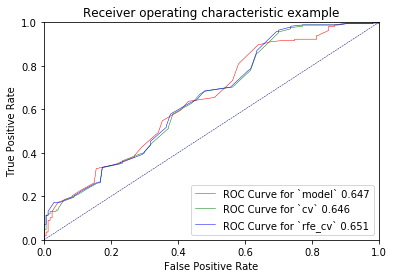

In [96]:
import matplotlib.pyplot as plt

plt.plot(fpr_lr, tpr_lr, label='ROC Curve for `model` {:.3f}'.format(roc_index_lr), color='red', lw=0.5)
plt.plot(fpr_lr_cv, tpr_lr_cv, label='ROC Curve for `cv` {:.3f}'.format(roc_index_lr_cv), color='green', lw=0.5)
plt.plot(fpr_rfe_cv, tpr_rfe_cv, label='ROC Curve for `rfe_cv` {:.3f}'.format(roc_index_rfe_cv), color='blue', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [98]:
df = pd.concat([X_train1,X_test1])

In [100]:
df.head()

,Patient age quantile,Proteina C reativa,Mean platelet volume,Monocytes,Red blood Cells,Platelets,Eosinophils,Basophils,Leukocytes,Mean corpuscular hemoglobin concentration,Hemoglobin,Hematocrit,Influenza B rapid test,Influenza A rapid test
2148,-1.797968,-0.000487,-0.077833,-0.070606,-0.043362,0.124252,0.137677,0.060341,0.140291,-0.02847,-0.044166,-0.039827,1.0,1.0
1573,-1.061963,-0.000487,-0.077833,-0.070606,-0.043362,0.124252,0.137677,0.060341,0.140291,-0.02847,-0.044166,-0.039827,0.0,0.0
141,-1.061963,-0.000487,-0.077833,-0.070606,-0.043362,0.124252,0.137677,0.060341,0.140291,-0.02847,-0.044166,-0.039827,0.0,0.0
3180,0.042043,-0.000487,-0.077833,-0.070606,-0.043362,0.124252,0.137677,0.060341,0.140291,-0.02847,-0.044166,-0.039827,0.0,0.0
2855,-0.509960,-0.000487,-0.077833,-0.070606,-0.043362,0.124252,0.137677,0.060341,0.140291,-0.02847,-0.044166,-0.039827,0.0,0.0


In [104]:
df['Target'] = rfe_cv.predict(df)

In [108]:
df.Target.sum()

839

In [107]:
df[df.Target==1].describe()

,Patient age quantile,Proteina C reativa,Mean platelet volume,Monocytes,Red blood Cells,Platelets,Eosinophils,Basophils,Leukocytes,Mean corpuscular hemoglobin concentration,Hemoglobin,Hematocrit,Influenza B rapid test,Influenza A rapid test,Target
count,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.000000,839.0
mean,0.374737,0.048939,0.040749,0.063795,0.068067,-0.128155,-0.063627,-0.025043,-0.106772,0.008235,0.071759,0.074413,0.103695,0.103695,1.0
std,0.798966,1.099898,0.993086,1.070078,1.005046,0.952075,0.821392,0.924883,0.906963,1.020532,0.954198,0.931028,0.320312,0.320312,0.0
min,-1.797968,-1.934314,-6.328667,-5.401449,-5.516977,-6.093531,-2.918574,-4.276807,-4.365758,-11.009013,-5.044539,-5.158128,0.000000,0.000000,1.0
25%,-0.325959,-0.000487,-0.077833,-0.070606,-0.043362,0.124252,0.137677,0.060341,0.140291,-0.028470,-0.044166,-0.039827,0.000000,0.000000,1.0
50%,0.410046,-0.000487,-0.077833,-0.070606,-0.043362,0.124252,0.137677,0.060341,0.140291,-0.028470,-0.044166,-0.039827,0.000000,0.000000,1.0
75%,0.962049,-0.000487,-0.077833,-0.070606,-0.043362,0.124252,0.137677,0.060341,0.140291,-0.028470,-0.044166,-0.039827,0.000000,0.000000,1.0
max,1.698053,12.678977,8.550457,9.356193,8.494034,5.153735,5.559347,8.504944,6.216277,6.153960,5.998795,5.199189,2.000000,2.000000,1.0


### Task 4: Predictive modeling using Neural Networks 

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
datanormalized = finalData.copy()
cols = list(datanormalized.columns)
cols = cols[:17]
for col in cols:
    datanormalized[col] = scaler.fit_transform(np.array(datanormalized[col]).reshape(-1,1)).ravel()
datanormalized.head()

C:\Users\pughatol\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pughatol\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,Patient age quantile,Proteina C reativa,Neutrophils,Mean platelet volume,Monocytes,Red blood cell distribution width,Red blood Cells,Platelets,Eosinophils,Basophils,Leukocytes,Mean corpuscular hemoglobin,Mean corpuscular volume,Mean corpuscular hemoglobin concentration,Lymphocytes,Hemoglobin,Hematocrit,Influenza B rapid test,Influenza A rapid test,SARS-Cov-2 exam result
14,-0.877962,-0.000487,0.018306,-0.077833,-0.070606,0.077918,-0.043362,0.124252,0.137677,0.060341,0.140291,0.005578,0.016887,-0.02847,0.002077,-0.044166,-0.039827,0.0,0.0,1
20,0.410046,-0.000487,0.018306,-0.077833,-0.070606,0.077918,-0.043362,0.124252,0.137677,0.060341,0.140291,0.005578,0.016887,-0.02847,0.002077,-0.044166,-0.039827,0.0,0.0,1
21,0.042043,-0.000487,0.018306,-0.077833,-0.070606,0.077918,-0.043362,0.124252,0.137677,0.060341,0.140291,0.005578,0.016887,-0.02847,0.002077,-0.044166,-0.039827,0.0,0.0,1
23,0.594047,-0.000487,0.018306,-0.077833,-0.070606,0.077918,-0.043362,0.124252,0.137677,0.060341,0.140291,0.005578,0.016887,-0.02847,0.002077,-0.044166,-0.039827,0.0,0.0,1
27,0.226044,-0.000487,0.018306,-0.077833,-0.070606,0.077918,-0.043362,0.124252,0.137677,0.060341,0.140291,0.005578,0.016887,-0.02847,0.002077,-0.044166,-0.039827,0.0,0.0,1


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
X = datanormalized.drop('SARS-Cov-2 exam result',axis=1)
y = datanormalized[['SARS-Cov-2 exam result']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=10)

In [32]:
from sklearn.neural_network import MLPClassifier
model_1 = MLPClassifier(random_state=10,verbose=True)
model_1.fit(X_train, y_train)
print("Train accuracy:", model_1.score(X_train, y_train))
print("Test accuracy:", model_1.score(X_test, y_test))
y_pred = model_1.predict(X_test)
print(classification_report(y_test, y_pred))
print(model_1)

C:\Users\pughatol\Documents\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.73344187
Iteration 2, loss = 0.71028092
Iteration 3, loss = 0.69156571
Iteration 4, loss = 0.67644525
Iteration 5, loss = 0.66527624
Iteration 6, loss = 0.65806570
Iteration 7, loss = 0.65227408
Iteration 8, loss = 0.64761580
Iteration 9, loss = 0.64373776
Iteration 10, loss = 0.64055557
Iteration 11, loss = 0.63765078
Iteration 12, loss = 0.63509785
Iteration 13, loss = 0.63260274
Iteration 14, loss = 0.63048978
Iteration 15, loss = 0.62855819
Iteration 16, loss = 0.62680443
Iteration 17, loss = 0.62506126
Iteration 18, loss = 0.62341190
Iteration 19, loss = 0.62182601
Iteration 20, loss = 0.62050510
Iteration 21, loss = 0.61894932
Iteration 22, loss = 0.61774790
Iteration 23, loss = 0.61642193
Iteration 24, loss = 0.61510767
Iteration 25, loss = 0.61396737
Iteration 26, loss = 0.61281180
Iteration 27, loss = 0.61167192
Iteration 28, loss = 0.61053765
Iteration 29, loss = 0.60954100
Iteration 30, loss = 0.60857994
Iteration 31, loss = 0.60755990
Iteration 32, los

C:\Users\pughatol\Documents\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
params = {'hidden_layer_sizes': [(x,) for x in range(1, 1000, 50)],
         'activation':['identity', 'logistic', 'tanh', 'relu']}

cv_nn = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=10,verbose=True),return_train_score=True, cv=StratifiedKFold(random_state=10), n_jobs=-1)
cv_nn.fit(X_train, y_train)

C:\Users\pughatol\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:624: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
C:\Users\pughatol\Documents\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.71937787
Iteration 2, loss = 0.69646773
Iteration 3, loss = 0.68072598
Iteration 4, loss = 0.67045258
Iteration 5, loss = 0.66281630
Iteration 6, loss = 0.65730746
Iteration 7, loss = 0.65244442
Iteration 8, loss = 0.64853976
Iteration 9, loss = 0.64510326
Iteration 10, loss = 0.64180940
Iteration 11, loss = 0.63915492
Iteration 12, loss = 0.63627043
Iteration 13, loss = 0.63419034
Iteration 14, loss = 0.63163607
Iteration 15, loss = 0.62987280
Iteration 16, loss = 0.62789930
Iteration 17, loss = 0.62636811
Iteration 18, loss = 0.62465055
Iteration 19, loss = 0.62276715
Iteration 20, loss = 0.62121058
Iteration 21, loss = 0.61972241
Iteration 22, loss = 0.61829995
Iteration 23, loss = 0.61671171
Iteration 24, loss = 0.61550676
Iteration 25, loss = 0.61417214
Iteration 26, loss = 0.61296386
Iteration 27, loss = 0.61188454
Iteration 28, loss = 0.61068473
Iteration 29, loss = 0.60948001
Iteration 30, loss = 0.60850516
Iteration 31, loss = 0.60753371
Iteration 32, los

C:\Users\pughatol\Documents\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=10, shuffle=False),
       error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=10, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes': [(1,), (51,), (101,), (151,), (201,), (251,), (301,), (351,), (401,), (451,), (501,), (551,), (601,), (651,), (701,), (751,), (801,), (851,), (901,), (951,)], 'activation': ['identity', 'logistic', 'tanh', 'relu']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [43]:
print("Train accuracy:", cv_nn.score(X_train, y_train))
print("Test accuracy:", cv_nn.score(X_test, y_test))
y_pred = cv_nn.predict(X_test)
print(classification_report(y_test, y_pred))
print(cv_nn.best_params_)

Train accuracy: 0.6350832266325224
Test accuracy: 0.6149253731343284
              precision    recall  f1-score   support

           0       0.64      0.51      0.57       167
           1       0.60      0.72      0.65       168

   micro avg       0.61      0.61      0.61       335
   macro avg       0.62      0.61      0.61       335
weighted avg       0.62      0.61      0.61       335

{'activation': 'relu', 'hidden_layer_sizes': (101,)}


In [44]:
datafiltered = datanormalized[['Patient age quantile','Leukocytes','Platelets','SARS-Cov-2 exam result']]
X = datafiltered.drop('SARS-Cov-2 exam result',axis=1)
y = datafiltered[['SARS-Cov-2 exam result']]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, stratify=y, random_state=10)

In [45]:
params = {'hidden_layer_sizes': [(x,) for x in range(1, 1000, 50)],
         'activation':['identity', 'logistic', 'tanh', 'relu']}

cv_nn1 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=10,verbose=True),return_train_score=True, cv=StratifiedKFold(random_state=10), n_jobs=-1)
cv_nn1.fit(X_train1, y_train1)

C:\Users\pughatol\Documents\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:624: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)
C:\Users\pughatol\Documents\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.68660585
Iteration 2, loss = 0.66965357
Iteration 3, loss = 0.66137035
Iteration 4, loss = 0.65611824
Iteration 5, loss = 0.65208690
Iteration 6, loss = 0.64946710
Iteration 7, loss = 0.64706291
Iteration 8, loss = 0.64507743
Iteration 9, loss = 0.64333840
Iteration 10, loss = 0.64152015
Iteration 11, loss = 0.63993347
Iteration 12, loss = 0.63842642
Iteration 13, loss = 0.63722204
Iteration 14, loss = 0.63622343
Iteration 15, loss = 0.63505717
Iteration 16, loss = 0.63414086
Iteration 17, loss = 0.63315713
Iteration 18, loss = 0.63234164
Iteration 19, loss = 0.63152385
Iteration 20, loss = 0.63066845
Iteration 21, loss = 0.62986657
Iteration 22, loss = 0.62913979
Iteration 23, loss = 0.62865896
Iteration 24, loss = 0.62790748
Iteration 25, loss = 0.62737607
Iteration 26, loss = 0.62671767
Iteration 27, loss = 0.62617928
Iteration 28, loss = 0.62565089
Iteration 29, loss = 0.62501768
Iteration 30, loss = 0.62448146
Iteration 31, loss = 0.62405173
Iteration 32, los

C:\Users\pughatol\Documents\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=10, shuffle=False),
       error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=10, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'hidden_layer_sizes': [(1,), (51,), (101,), (151,), (201,), (251,), (301,), (351,), (401,), (451,), (501,), (551,), (601,), (651,), (701,), (751,), (801,), (851,), (901,), (951,)], 'activation': ['identity', 'logistic', 'tanh', 'relu']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [46]:
print("Train accuracy:", cv_nn1.score(X_train1, y_train1))
print("Test accuracy:", cv_nn1.score(X_test1, y_test1))
y_pred1 = cv_nn1.predict(X_test1)
print(classification_report(y_test1, y_pred1))
print(cv_nn1.best_params_)

Train accuracy: 0.6235595390524968
Test accuracy: 0.6268656716417911
              precision    recall  f1-score   support

           0       0.68      0.48      0.56       167
           1       0.60      0.77      0.68       168

   micro avg       0.63      0.63      0.63       335
   macro avg       0.64      0.63      0.62       335
weighted avg       0.64      0.63      0.62       335

{'activation': 'relu', 'hidden_layer_sizes': (551,)}


ROC index on test for `model`: 0.6508055317935558
ROC index on test for `cv`: 0.6612132877102936
ROC index on test for `rfe_cv`: 0.6604469632164243


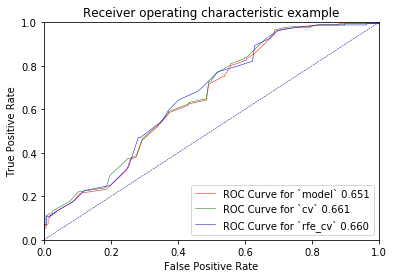

In [48]:
from sklearn.metrics import roc_auc_score
y_pred_proba_lr = model_1.predict_proba(X_test)
y_pred_proba_lr_cv = cv_nn.predict_proba(X_test)
y_pred_proba_rfe_cv = cv_nn1.predict_proba(X_test1)

roc_index_lr = roc_auc_score(y_test, y_pred_proba_lr[:, 1])
roc_index_lr_cv = roc_auc_score(y_test, y_pred_proba_lr_cv[:, 1])
roc_index_rfe_cv = roc_auc_score(y_test, y_pred_proba_rfe_cv[:, 1])

print("ROC index on test for `model`:", roc_index_lr)
print("ROC index on test for `cv`:", roc_index_lr_cv)
print("ROC index on test for `rfe_cv`:", roc_index_rfe_cv)

from sklearn.metrics import roc_curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr[:,1])
fpr_lr_cv, tpr_lr_cv, thresholds_lr_cv = roc_curve(y_test, y_pred_proba_lr_cv[:,1])
fpr_rfe_cv, tpr_rfe_cv, thresholds_rfe_cv = roc_curve(y_test, y_pred_proba_rfe_cv[:,1])

import matplotlib.pyplot as plt

plt.plot(fpr_lr, tpr_lr, label='ROC Curve for `model` {:.3f}'.format(roc_index_lr), color='red', lw=0.5)
plt.plot(fpr_lr_cv, tpr_lr_cv, label='ROC Curve for `cv` {:.3f}'.format(roc_index_lr_cv), color='green', lw=0.5)
plt.plot(fpr_rfe_cv, tpr_rfe_cv, label='ROC Curve for `rfe_cv` {:.3f}'.format(roc_index_rfe_cv), color='blue', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [50]:
df = pd.concat([X_train,X_test])
df['Target'] = cv_nn.predict(df)
df.Target.sum()

658

In [51]:
df[df.Target==1].describe()

,Patient age quantile,Proteina C reativa,Neutrophils,Mean platelet volume,Monocytes,Red blood cell distribution width,Red blood Cells,Platelets,Eosinophils,Basophils,Leukocytes,Mean corpuscular hemoglobin,Mean corpuscular volume,Mean corpuscular hemoglobin concentration,Lymphocytes,Hemoglobin,Hematocrit,Influenza B rapid test,Influenza A rapid test,Target
count,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,658.0
mean,0.121460,0.053850,-0.011713,0.035179,0.103567,0.057135,0.069238,-0.150855,-0.081900,0.001593,-0.161050,-0.006155,-0.018705,0.024376,-0.000798,0.072025,0.070063,0.100304,0.100304,1.0
std,0.661887,1.111528,1.033363,0.965519,1.119600,1.146567,1.013253,0.990057,0.817921,0.991587,0.940878,1.080159,1.036651,1.040428,0.972261,0.952028,0.909667,0.310594,0.310594,0.0
min,-1.429966,-1.934314,-7.101506,-5.006077,-5.401449,-4.071972,-4.808840,-6.093531,-2.918574,-4.276807,-4.365758,-15.895553,-13.994559,-11.009013,-5.276825,-5.241740,-5.665127,0.000000,0.000000,1.0
25%,-0.509960,-0.000487,0.018306,-0.077833,-0.070606,0.077918,-0.043362,0.124252,0.137677,0.060341,0.140291,0.005578,0.016887,-0.028470,0.002077,-0.044166,-0.039827,0.000000,0.000000,1.0
50%,0.226044,-0.000487,0.018306,-0.077833,-0.070606,0.077918,-0.043362,0.124252,0.137677,0.060341,0.140291,0.005578,0.016887,-0.028470,0.002077,-0.044166,-0.039827,0.000000,0.000000,1.0
75%,0.594047,-0.000487,0.018306,-0.077833,-0.070606,0.077918,-0.043362,0.124252,0.137677,0.060341,0.140291,0.005578,0.016887,-0.028470,0.002077,-0.044166,-0.039827,0.000000,0.000000,1.0
max,1.698053,12.678977,6.561012,8.550457,9.356193,15.484212,8.494034,5.418822,4.017907,8.504944,2.889767,4.584853,5.809398,6.153960,6.706622,5.998795,5.199189,2.000000,2.000000,1.0


### Task 4: Final remarks: Decision making  

In [17]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
X = finalData.drop('SARS-Cov-2 exam result',axis=1)
y = finalData[['SARS-Cov-2 exam result']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=10)
dtclassifier = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')
dtclassifier.fit(X_train,y_train)
print("Train accuracy:", dtclassifier.score(X_train, y_train))
print("Test accuracy:", dtclassifier.score(X_test, y_test))

Train accuracy: 0.5902688860435339
Test accuracy: 0.6208955223880597


In [19]:
# Regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dataregression = finalData.copy()
cols = list(dataregression.columns)
cols = cols[:17]
for col in cols:
    dataregression[col] = scaler.fit_transform(np.array(dataregression[col]).reshape(-1,1)).ravel()
reducedData = dataregression[['Patient age quantile','Proteina C reativa','Mean platelet volume','Monocytes','Red blood Cells','Platelets','Eosinophils','Basophils','Leukocytes','Mean corpuscular hemoglobin concentration','Hemoglobin','Hematocrit','Influenza B rapid test','Influenza A rapid test','SARS-Cov-2 exam result']]
X = reducedData.drop('SARS-Cov-2 exam result',axis=1)
y = reducedData[['SARS-Cov-2 exam result']]
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, stratify=y, random_state=10)
logregressor = LogisticRegression(C= 0.0001,random_state= 2475,solver= 'sag',tol= 0.01)
logregressor.fit(X_train1,y_train1)
print("Train accuracy:", logregressor.score(X_train1, y_train1))
print("Test accuracy:", logregressor.score(X_test1, y_test1))

Train accuracy: 0.5979513444302177
Test accuracy: 0.6119402985074627


C:\Users\pughatol\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pughatol\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pughatol\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
from sklearn.neural_network import MLPClassifier
scaler = StandardScaler()
datanormalized = finalData.copy()
cols = list(datanormalized.columns)
cols = cols[:17]
for col in cols:
    datanormalized[col] = scaler.fit_transform(np.array(datanormalized[col]).reshape(-1,1)).ravel()
X = datanormalized.drop('SARS-Cov-2 exam result',axis=1)
y = datanormalized[['SARS-Cov-2 exam result']]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, stratify=y, random_state=10)
ann = MLPClassifier(random_state=10,activation= 'relu', hidden_layer_sizes=(551,),verbose=True)
ann.fit(X_train2,y_train2)
print("Train accuracy:", ann.score(X_train2, y_train2))
print("Test accuracy:", ann.score(X_test2, y_test2))

C:\Users\pughatol\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pughatol\Documents\Anaconda\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\pughatol\Documents\Anaconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:916: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.70238506
Iteration 2, loss = 0.66729381
Iteration 3, loss = 0.65306179
Iteration 4, loss = 0.64253253
Iteration 5, loss = 0.63461119
Iteration 6, loss = 0.62873269
Iteration 7, loss = 0.62402122
Iteration 8, loss = 0.62008356
Iteration 9, loss = 0.61668137
Iteration 10, loss = 0.61345697
Iteration 11, loss = 0.61037846
Iteration 12, loss = 0.60788815
Iteration 13, loss = 0.60560984
Iteration 14, loss = 0.60353187
Iteration 15, loss = 0.60171094
Iteration 16, loss = 0.59984919
Iteration 17, loss = 0.59815385
Iteration 18, loss = 0.59649157
Iteration 19, loss = 0.59517486
Iteration 20, loss = 0.59384068
Iteration 21, loss = 0.59252769
Iteration 22, loss = 0.59119097
Iteration 23, loss = 0.59006377
Iteration 24, loss = 0.58895203
Iteration 25, loss = 0.58806210
Iteration 26, loss = 0.58708682
Iteration 27, loss = 0.58595295
Iteration 28, loss = 0.58516270
Iteration 29, loss = 0.58429011
Iteration 30, loss = 0.58354565
Iteration 31, loss = 0.58271274
Iteration 32, los

ROC index on test for `DT`: 0.6345523239235814
ROC index on test for `LR`: 0.6465283718277731
ROC index on test for `ANN`: 0.6573282007413743


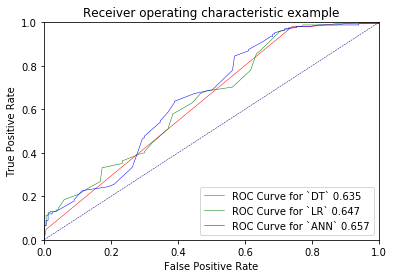

In [23]:
from sklearn.metrics import roc_auc_score
y_pred_proba_lr = dtclassifier.predict_proba(X_test)
y_pred_proba_lr_cv = logregressor.predict_proba(X_test1)
y_pred_proba_rfe_cv = ann.predict_proba(X_test2)

roc_index_lr = roc_auc_score(y_test, y_pred_proba_lr[:, 1])
roc_index_lr_cv = roc_auc_score(y_test, y_pred_proba_lr_cv[:, 1])
roc_index_rfe_cv = roc_auc_score(y_test, y_pred_proba_rfe_cv[:, 1])

print("ROC index on test for `DT`:", roc_index_lr)
print("ROC index on test for `LR`:", roc_index_lr_cv)
print("ROC index on test for `ANN`:", roc_index_rfe_cv)

from sklearn.metrics import roc_curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr[:,1])
fpr_lr_cv, tpr_lr_cv, thresholds_lr_cv = roc_curve(y_test, y_pred_proba_lr_cv[:,1])
fpr_rfe_cv, tpr_rfe_cv, thresholds_rfe_cv = roc_curve(y_test, y_pred_proba_rfe_cv[:,1])

import matplotlib.pyplot as plt

plt.plot(fpr_lr, tpr_lr, label='ROC Curve for `DT` {:.3f}'.format(roc_index_lr), color='red', lw=0.5)
plt.plot(fpr_lr_cv, tpr_lr_cv, label='ROC Curve for `LR` {:.3f}'.format(roc_index_lr_cv), color='green', lw=0.5)
plt.plot(fpr_rfe_cv, tpr_rfe_cv, label='ROC Curve for `ANN` {:.3f}'.format(roc_index_rfe_cv), color='blue', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()